In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

In [2]:
spotify_df = pd.read_csv("dataset-of-10s.csv")

# Sample of the data

In [42]:
spotify_df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


# Data description

In [36]:
spotify_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


In [37]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


# Number of missing values

Text(0.5, 1.0, 'Null Values in Data')

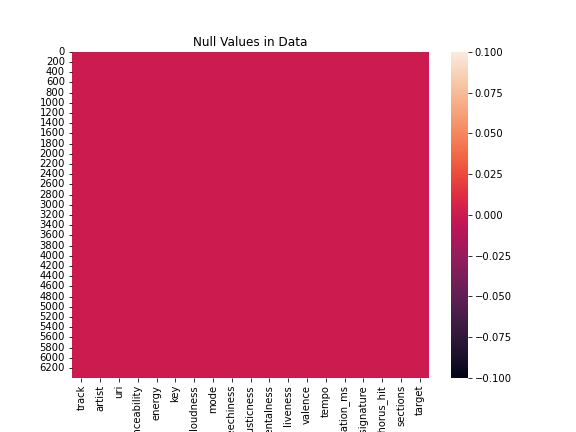

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(spotify_df.isnull())
plt.title("Null Values in Data")

In [39]:
spotify_df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

# Features distribution

In [4]:
spotify_hits = spotify_df[spotify_df["target"] == 1]
spotify_non_hits = spotify_df[spotify_df["target"] == 0]

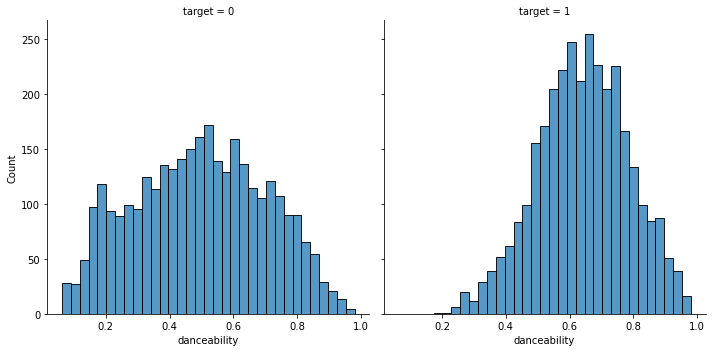

In [5]:
sns.displot(spotify_df, x="danceability", col="target", multiple="dodge")

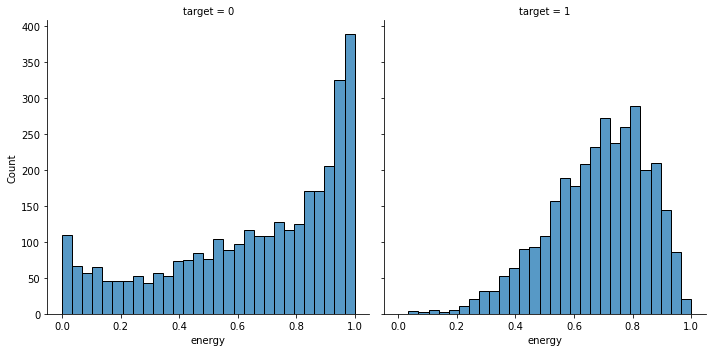

In [6]:
sns.displot(spotify_df, x="energy", col="target", multiple="dodge")

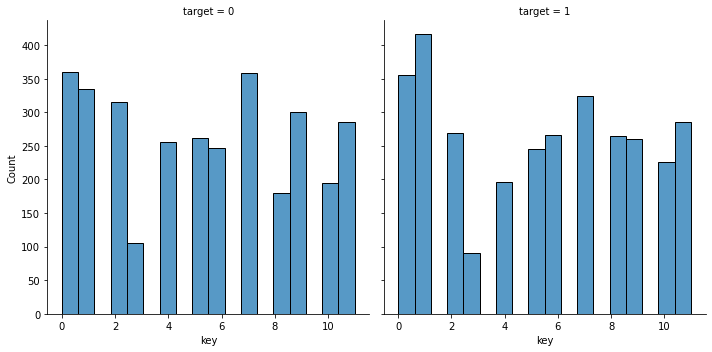

In [7]:
sns.displot(spotify_df, x="key", col="target", multiple="dodge")

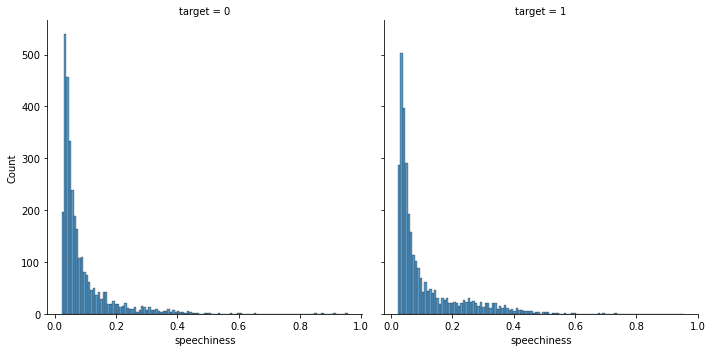

In [8]:
sns.displot(spotify_df, x="speechiness", col="target", multiple="dodge")

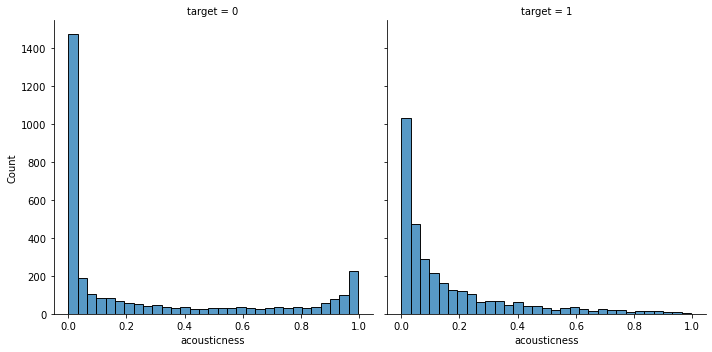

In [9]:
sns.displot(spotify_df, x="acousticness", col="target", multiple="dodge")

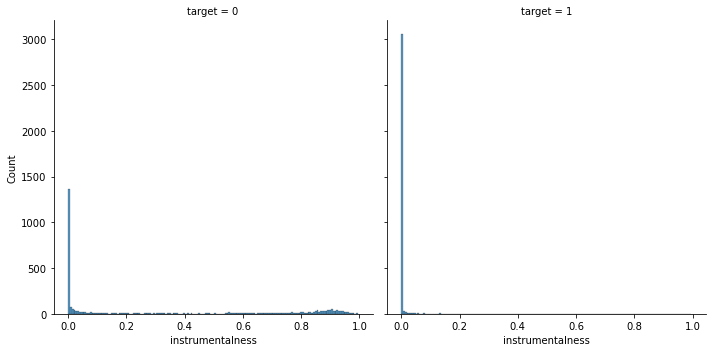

In [10]:
sns.displot(spotify_df, x="instrumentalness", col="target", multiple="dodge")

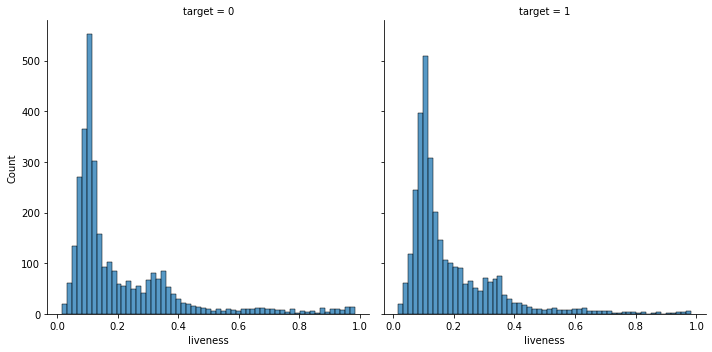

In [11]:
sns.displot(spotify_df, x="liveness", col="target", multiple="dodge")

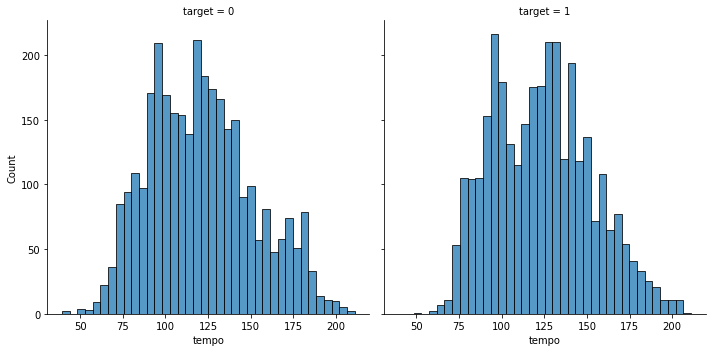

In [12]:
sns.displot(spotify_df, x="tempo", col="target", multiple="dodge")

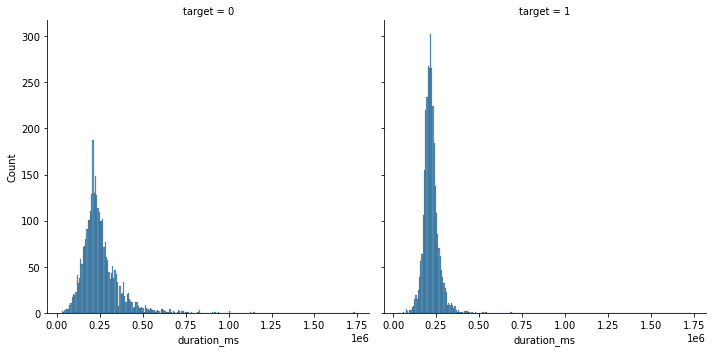

In [13]:
sns.displot(spotify_df, x="duration_ms", col="target", multiple="dodge")

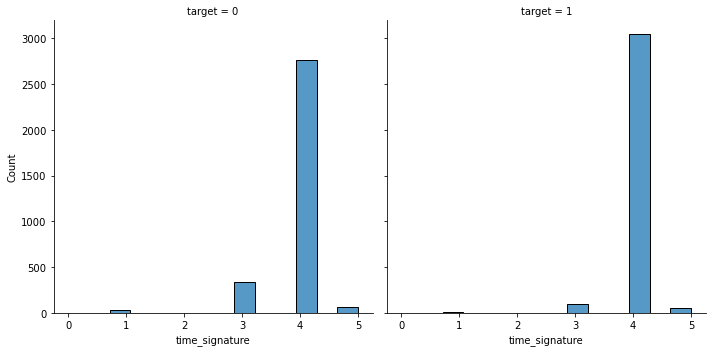

In [14]:
sns.displot(spotify_df, x="time_signature", col="target", multiple="dodge")

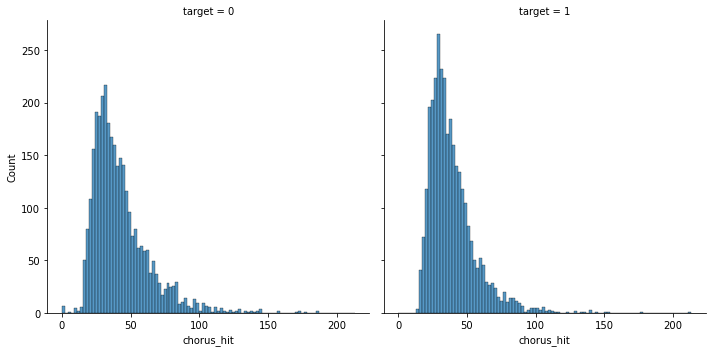

In [15]:
sns.displot(spotify_df, x="chorus_hit", col="target", multiple="dodge")

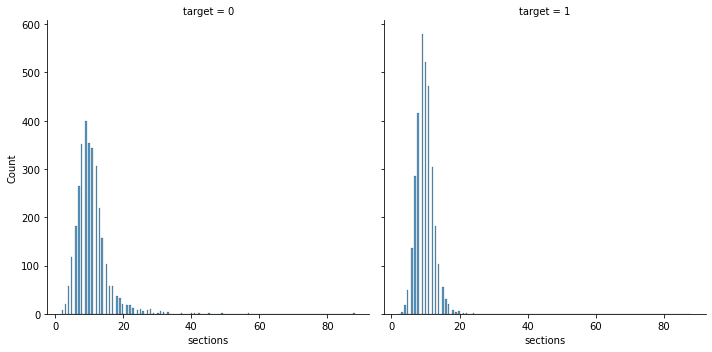

In [16]:
sns.displot(spotify_df, x="sections", col="target", multiple="dodge")

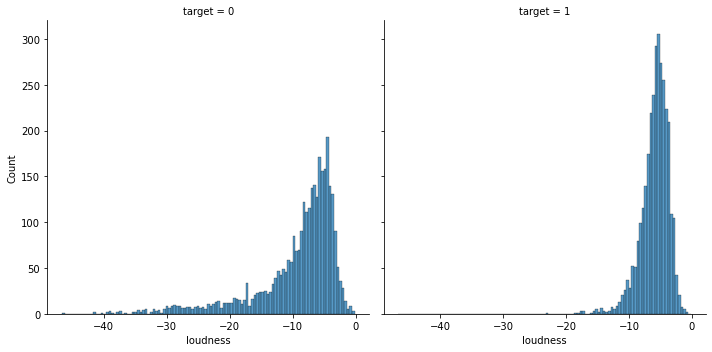

In [17]:
sns.displot(spotify_df, x="loudness", col="target", multiple="dodge")

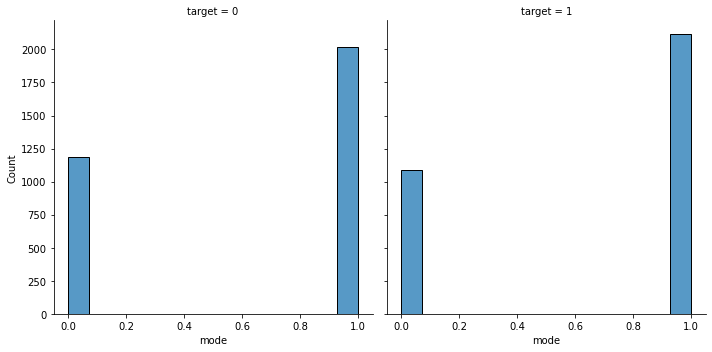

In [18]:
sns.displot(spotify_df, x="mode", col="target", multiple="dodge")

# Plotting pairs of features

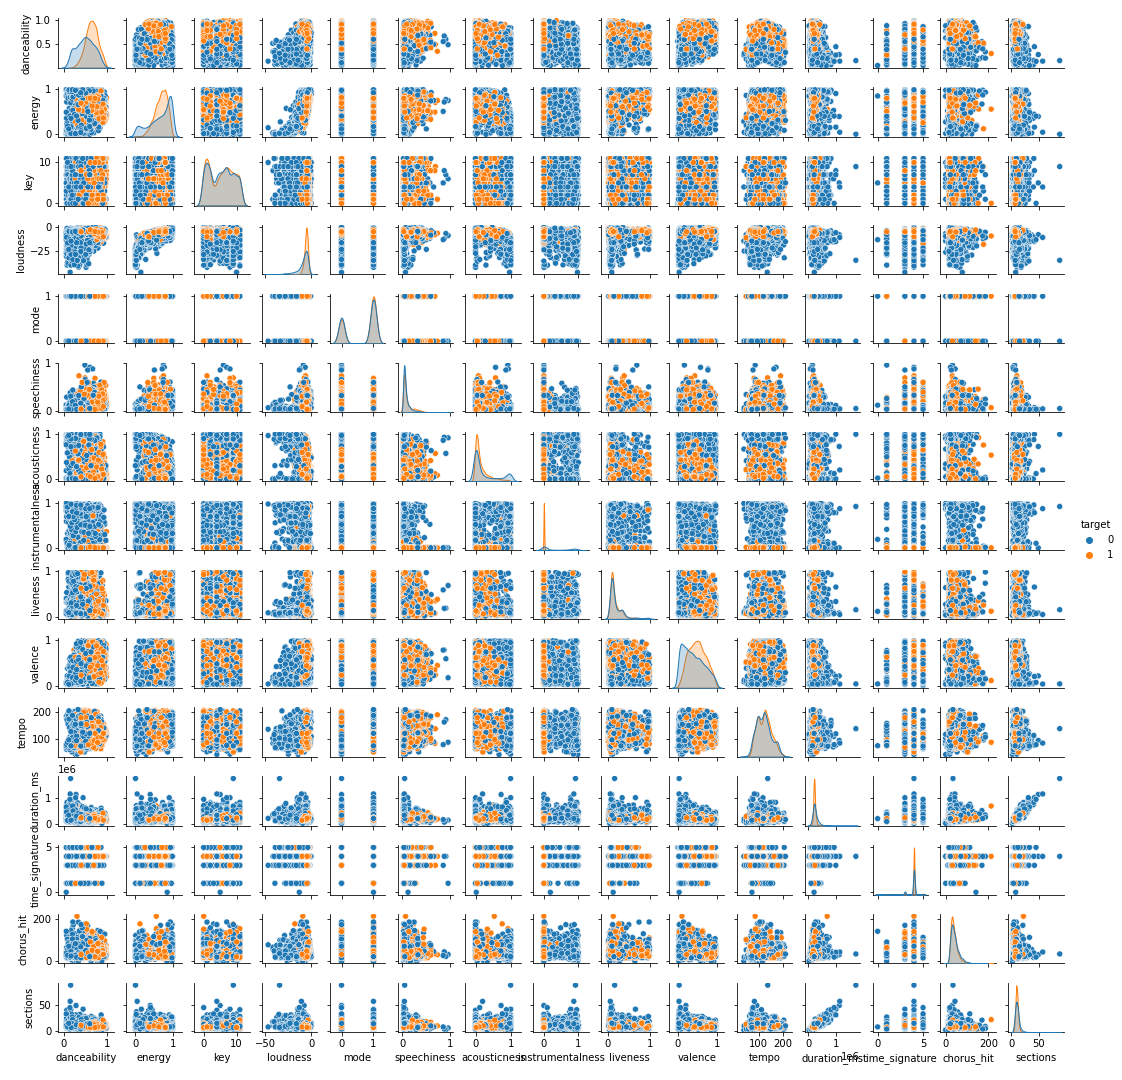

In [41]:
sns.pairplot(spotify_df.drop(["track", "artist", "uri"], axis=1), hue="target", height=1.0)

# Using PCA to reduce the dimensions

### 2 dimensions

In [19]:
possible_features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", 
                     "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature", 
                     "chorus_hit", "sections"]
# Separating out the features
features = spotify_df.loc[:, possible_features].values
# Separating out the target
target = spotify_df.loc[:,["target"]].values
# Standardizing the features
x = StandardScaler().fit_transform(features)

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [21]:
finalDf = pd.concat([principalDf, spotify_df[['target']]], axis = 1)

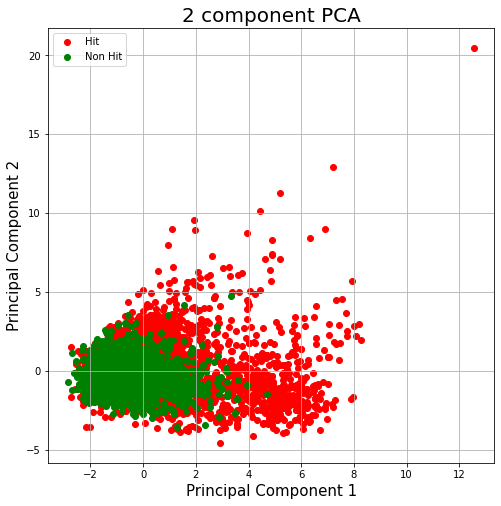

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], c = color)
ax.legend(["Hit", "Non Hit"])
ax.grid()
plt.show()

### 3 dimensions

In [23]:
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(x)
principalDf_3d = pd.DataFrame(data = principalComponents_3d, columns = ['principal component 1', 'principal component 2', 
                                                                        'principal component 3'])

finalDf_3d = pd.concat([principalDf_3d, spotify_df[['target']]], axis = 1)

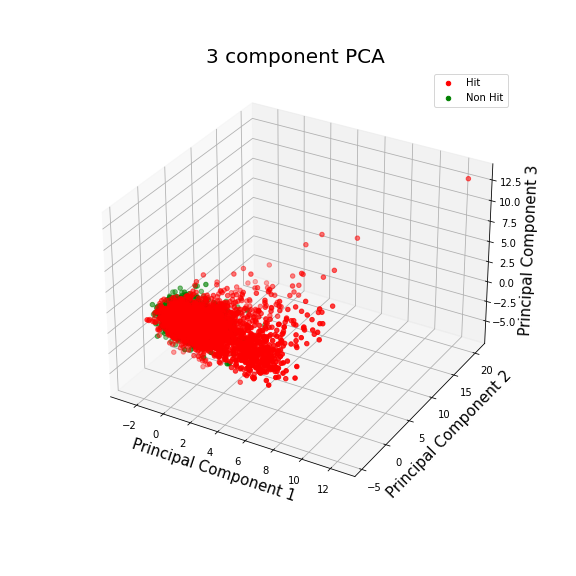

In [25]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_3d['target'] == target
    ax.scatter(finalDf_3d.loc[indicesToKeep, 'principal component 1'], 
               finalDf_3d.loc[indicesToKeep, 'principal component 2'], 
               finalDf_3d.loc[indicesToKeep, 'principal component 3'], c = color)
ax.legend(["Hit", "Non Hit"])
ax.grid()
plt.show()